In [1]:
# notebook last tested with abtem version 1.0.0beta32
%matplotlib inline

from abtem import __version__
print('current version:', __version__)

from ase.io import read
from ase.cluster import wulff_construction
from ase import Atoms
import ase.data
import matplotlib.pyplot as plt
from scipy import constants
from abtem import *
import numpy as np

/zhome/ab/7/153983/project/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


current version: 1.0.0beta32


# HRTEM simulation of nanoparticle

Number of atoms: 16727


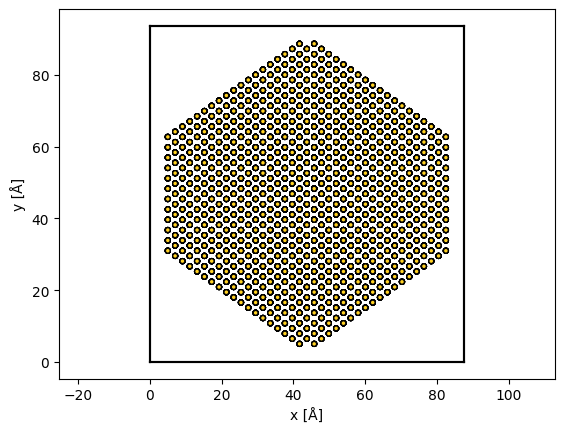

In [2]:
surfaces = [(1, 0, 0), (1, 1, 0), (1, 1, 1)] # Nanoparticle facets

esurf = [1.0, 1.1, 0.9] # Relative surface energies

size = 16000 # Target number of atoms

atoms = Atoms(wulff_construction('Au', surfaces, esurf, size, 'fcc', rounding='above'))

atoms.rotate(45, 'x', center='cop')

atoms.center(vacuum=5.)

atoms.center(vacuum=2., axis=2)

show_atoms(atoms)

print("Number of atoms:", len(atoms))

Get a reasonable sampling (0.05 Å)

In [3]:
gridpoints = int(max(atoms.cell[0,0], atoms.cell[1,1]) / 0.05)
print("Grid points:", gridpoints)
gridpoints = 4096

Grid points: 1873


# For loop


In [4]:
num_configs = 30 # number of frozen phonon configurations
phonons = True
diff = []

In [5]:

for i in range(num_configs):
    print("Configuration: {}".format(i+1))
    
    # FrozenPhonons
    if phonons:
        mass = ase.data.atomic_masses[ase.data.atomic_numbers['Au']]
        TD = 165  # Kittel
        T = 300
        U_squared = (3 * constants.hbar**2 / (2 *  mass * ase.units._amu * constants.k * TD)
                     * (1/4 + T / TD))
        sigmas = {'Au': np.sqrt(U_squared) * 1e10} # standard deviations of thermal vibrations

        frozen_phonons = FrozenPhonons(atoms, num_configs=num_configs, sigmas=sigmas)
        potential = Potential(frozen_phonons, 
                              gpts=gridpoints, 
                              slice_thickness=0.5, # Changed from 0.5
                              device='gpu',
                              #storage='cpu',
                              precalculate=False,
                              parametrization='kirkland', 
                              projection='infinite')

    else:
        potential = Potential(atoms, 
                          gpts=gridpoints, 
                          slice_thickness=0.5, 
                          device='gpu',
                          #storage='cpu',
                          parametrization='kirkland', 
                          projection='infinite')
        potential.sampling
    
    # Calculate the angle
    angle = 2*4.5e-3
    defocus = 40/np.sin(angle)
    
    # Creating a Probe
    wave = Probe(sampling=potential.sampling,
        device='gpu',
        semiangle_cutoff=angle*1000,
        extent=potential.extent,
        defocus=defocus, 
        energy=30e3 # acceleration voltage in eVhttp://localhost:8080/notebooks/Kikuchi.ipynb#
    )
    
    # create a wave at specifi position
    waves = wave.multislice((45,45), potential)
    exit_wave = waves
    
    # 
    print("ext: {} sam: {}".format(potential.extent,potential.sampling))
    energy = wave.energy
    del potential, wave
    
    # Hack to move data back to CPU
    if False:
        exit_wave._array = exit_wave._array.get()
        exit_wave._device = 'cpu'
    
    diff.append(exit_wave.diffraction_pattern(max_angle='valid'))

Configuration: 1


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 106.78it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 2


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 110.77it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 3


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.43it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 4


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.05it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 5


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.23it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 6


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 110.12it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 7


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 110.21it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 8


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 108.53it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 9


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.21it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 10


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.58it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 11


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 110.26it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 12


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.55it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 13


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.96it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 14


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 108.39it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 15


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.41it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 16


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.10it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 17


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.46it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 18


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 108.60it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 19


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 110.12it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 20


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.86it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 21


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.42it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 22


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.18it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 23


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.67it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 24


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 110.11it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 25


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.40it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 26


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.65it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 27


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.70it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 28


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.33it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 29


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 110.45it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)
Configuration: 30


Multislice: 100%|████████████████████████████████████████████████████████████████████| 176/176 [00:01<00:00, 109.59it/s]


ext: (87.52000000000001, 93.66487434999232) sam: (0.021367187500000002, 0.022867400964353593)


In [6]:
potential.sampling

NameError: name 'potential' is not defined

In [ ]:
potential.extent

In [ ]:
if phonons:
    diff = exit_wave.diffraction_pattern(max_angle='valid').mean(0)
else:
    diff = exit_wave.diffraction_pattern(max_angle='valid')
diff.show(power=.25)
plt.savefig("spots_phonons.png")

In [ ]:
diff.show(vmax=5e7)